<a href="https://colab.research.google.com/github/moatazkrimchi/Machine_Learning/blob/main/Valeurs_Aberrantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importer packages 
import pandas as pd
import numpy as np
import seaborn as sns 

In [ ]:
# Importer datasets
df = pd.read_csv('/content/drive/MyDrive/Kaggle/NBA_season1718_salary.csv')

In [ ]:
df.head(10)

,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0
5,6,Kyle Lowry,TOR,28703704.0
6,7,Russell Westbrook,OKC,28530608.0
7,8,Mike Conley,MEM,28530608.0
8,9,James Harden,HOU,28299399.0
9,10,DeMar DeRozan,TOR,27739975.0


In [ ]:
df.tail(10)

,Unnamed: 0,Player,Tm,season17_18
563,564,Trey McKinney-Jones,IND,46080.0
564,565,Jameel Warney,DAL,46080.0
565,566,Marcus Thornton,CLE,46080.0
566,567,DeAndre Liggins,ATL,26773.0
567,568,Axel Toupane,NOP,25000.0
568,569,Quinn Cook,NOP,25000.0
569,570,Chris Johnson,HOU,25000.0
570,571,Beno Udrih,DET,25000.0
571,572,Joel Bolomboy,MIL,22248.0
572,573,Jarell Eddie,CHI,17224.0


In [ ]:
# Verification des valeurs manquentes 
df.isnull().sum()

Unnamed: 0     0
Player         0
Tm             0
season17_18    0
dtype: int64

In [ ]:
df.shape

(573, 4)

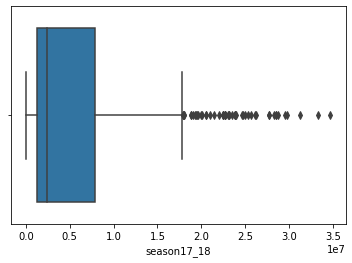

In [ ]:
# boxplot
sns.boxplot(x=df['season17_18'])

In [ ]:
upper_lim = df['season17_18'].quantile(.95)
df_outliers = df[df['season17_18']>upper_lim]
df_outliers

,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0
5,6,Kyle Lowry,TOR,28703704.0
6,7,Russell Westbrook,OKC,28530608.0
7,8,Mike Conley,MEM,28530608.0
8,9,James Harden,HOU,28299399.0
9,10,DeMar DeRozan,TOR,27739975.0


In [ ]:
# Detecter les valeurs aberantes en utilisant Z-score
outliers = []
def detect_outliers(data):
  threshold = 3 
  mean = np.mean(data)
  std = np.std(data)
  for i in data:
    z_score = (i - mean) / std
    if np.abs(z_score) > threshold:
      outliers.append(i)
  return outliers

In [ ]:
# detecter les salaires considerés comme outliers
detect_outliers(df['season17_18'])

[34682550.0,
 33285709.0,
 31269231.0,
 29727900.0,
 29512900.0,
 28703704.0,
 28530608.0,
 28530608.0,
 28299399.0,
 27739975.0,
 27734405.0]